In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X = dataset.iloc[:,3:-1]

In [9]:
pd.unique(X['Geography'])

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
encoder = LabelEncoder()

In [11]:
X['Gender'] = encoder.fit_transform(X['Gender'])

In [12]:
X['Gender'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: Gender, dtype: int32

In [13]:
X['Geography'] = encoder.fit_transform(X['Geography'])

In [14]:
X['Geography'].head(10)

0    0
1    2
2    0
3    0
4    2
5    2
6    0
7    1
8    0
9    0
Name: Geography, dtype: int32

In [15]:
X = X.drop('Geography', axis=1)

In [16]:
geog = dataset['Geography']

In [17]:
geog = encoder.fit_transform(geog)

In [18]:
onehot = OneHotEncoder()

In [19]:
geog = onehot.fit_transform(geog.reshape(-1,1)).toarray()

In [20]:
geog[:3]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [21]:
X = X.values

In [22]:
X = np.c_[X,geog]

In [23]:
X[0]

array([6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0134888e+05, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [24]:
y = dataset['Exited'].values

In [25]:
sc = StandardScaler()

In [26]:
X = sc.fit_transform(X)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [28]:
x_train.shape

(7500, 12)

In [29]:
y_train.shape

(7500,)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [31]:
classifier = Sequential()

In [32]:
classifier.add(Dense(units = 10, input_shape = [x_train.shape[1]]))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [33]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [34]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train,y_train,epochs = 10)

Epoch 1/10
2208/7500 [=======>......................] - ETA: 19s - loss: 0.8551 - accuracy: 0.2024

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155901). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


7500/7500 [==============================] - 9s 1ms/step - loss: 0.6892 - accuracy: 0.5395
Epoch 2/10
7500/7500 [==============================] - 0s 63us/step - loss: 0.4677 - accuracy: 0.8068 0s - loss: 0.4961 - 
Epoch 3/10
7500/7500 [==============================] - 1s 68us/step - loss: 0.4346 - accuracy: 0.8059
Epoch 4/10
7500/7500 [==============================] - 1s 73us/step - loss: 0.4283 - accuracy: 0.8100
Epoch 5/10
7500/7500 [==============================] - 0s 64us/step - loss: 0.4240 - accuracy: 0.8123
Epoch 6/10
7500/7500 [==============================] - 0s 57us/step - loss: 0.4198 - accuracy: 0.8187
Epoch 7/10
7500/7500 [==============================] - 1s 74us/step - loss: 0.4156 - accuracy: 0.8243
Epoch 8/10
7500/7500 [==============================] - 1s 73us/step - loss: 0.4109 - accuracy: 0.8267
Epoch 9/10
7500/7500 [==============================] - 1s 77us/step - loss: 0.4062 - accuracy: 0.8283
Epoch 10/10
7500/7500 [==============================] - 0s 62us

In [35]:
import matplotlib.pyplot as plt

In [36]:
classifier.history

In [37]:
classifier.history.history

{'loss': [0.6891810165246328,
  0.46766537647247314,
  0.4346313274383545,
  0.4282953237215678,
  0.42401371207237243,
  0.4198031520843506,
  0.41559154504140217,
  0.41093549998601275,
  0.4061540892839432,
  0.40133962105115256],
 'accuracy': [0.5394667,
  0.8068,
  0.80586666,
  0.81,
  0.81226665,
  0.81866664,
  0.8242667,
  0.82666665,
  0.8282667,
  0.8304]}

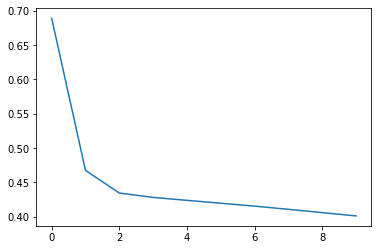

In [42]:
x_axis = [i for i in range(10)]
plt.plot(x_axis,classifier.history.history['loss'])

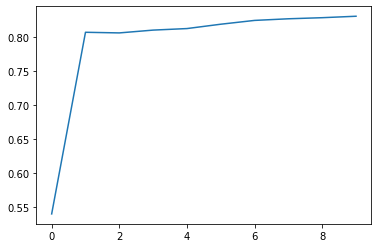

In [41]:
x_axis = [i for i in range(10)]
plt.plot(x_axis,classifier.history.history['accuracy'])